# Exoplanetas

---
---

## Limpieza de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alrakomala/BeePy/main/exoplanetas_05_2023.csv', comment='#')

df.head(3)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027


In [3]:
df.shape

(9564, 83)

In [4]:
df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_time0bk',
       'koi_time0', 'koi_eccen', 'koi_longp', 'koi_impact', 'koi_duration',
       'koi_ingress', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_fittype',
       'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor',
       'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3',
       'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_parm_prov', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters',
       'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 'koi_model_chisq',
       'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff', 'koi_slogg',
       'koi_smet', 'koi_srad', 'koi_smass', 'koi_s

In [5]:
df1 = df[['kepid', 'koi_disposition', 'koi_pdisposition', 
        'koi_period', 'koi_duration', 'koi_depth', 
        'koi_ror', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 
        'koi_model_snr', 'koi_count', 'koi_steff', 'koi_slogg', 
        'koi_smet', 'koi_srad', 'koi_smass', 'koi_sage', 'ra', 'dec', 'koi_gmag']].copy()

_koi_disposition_ y _koi_pdisposition_ indican la clasificación del objeto: 

    * exoplaneta confirmado 
    * falso positivo 
    * candidato

Los falsos positivos pueden ser por sistemas binarios (estrella-estrella) o por variabilidad en la luminosidad de la estrella.

In [6]:
renombrar_cols = {'kepid': 'id', 
                  'koi_disposition' :'clasificacion_archivo' , 
                  'koi_pdisposition' : 'clasificacion_kepler', 
                  'koi_period' : 'periodo', 
                  'koi_duration' : 'duracion_transito', 
                  'koi_depth' : 'profundidad_transito', 
                  'koi_ror' : 'razon_radio_planeta_estrella',
                  'koi_prad': 'radio_planeta', 
                  'koi_sma': 'semi-eje-mayor', 
                  'koi_incl': 'inclinacion', 
                  'koi_teq': 'temperatura_equilibrio', 
                  'koi_model_snr' : 'sn_modelo', 
                  'koi_count' : 'numero_planetas', 
                  'koi_steff': 'temp_superficial_estrella', 
                  'koi_slogg': 'gravedad_superficial_estrella', 
                  'koi_smet' : 'metalicidad_estrella',
                  'koi_srad' : 'radio_estrella', 
                  'koi_smass' : 'masa_estrella',
                  'koi_sage' : 'edad_estrella', 
                  'koi_gmag' : 'gmag_estrella'  }

df1.rename(columns=renombrar_cols, inplace=True)

In [7]:
df1.head()

,id,clasificacion_archivo,clasificacion_kepler,periodo,duracion_transito,profundidad_transito,razon_radio_planeta_estrella,radio_planeta,semi-eje-mayor,inclinacion,...,numero_planetas,temp_superficial_estrella,gravedad_superficial_estrella,metalicidad_estrella,radio_estrella,masa_estrella,edad_estrella,ra,dec,gmag_estrella
0,10797460,CONFIRMED,CANDIDATE,9.488036,2.95750,615.8,0.022344,2.26,0.0853,89.66,...,2,5455.0,4.467,0.14,0.927,0.919,NaN,291.93423,48.141651,15.890
1,10797460,CONFIRMED,CANDIDATE,54.418383,4.50700,874.8,0.027954,2.83,0.2734,89.57,...,2,5455.0,4.467,0.14,0.927,0.919,NaN,291.93423,48.141651,15.890
2,10811496,CANDIDATE,CANDIDATE,19.899140,1.78220,10829.0,0.154046,14.60,0.1419,88.96,...,1,5853.0,4.544,-0.18,0.868,0.961,NaN,297.00482,48.134129,15.943
3,10848459,FALSE POSITIVE,FALSE POSITIVE,1.736952,2.40641,8079.2,0.387394,33.46,0.0267,67.09,...,1,5805.0,4.564,-0.52,0.791,0.836,NaN,285.53461,48.285210,16.100
4,10854555,CONFIRMED,CANDIDATE,2.525592,1.65450,603.3,0.024064,2.75,0.0374,85.41,...,1,6031.0,4.438,0.07,1.046,1.095,NaN,288.75488,48.226200,16.015


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             9564 non-null   int64  
 1   clasificacion_archivo          9564 non-null   object 
 2   clasificacion_kepler           9564 non-null   object 
 3   periodo                        9564 non-null   float64
 4   duracion_transito              9564 non-null   float64
 5   profundidad_transito           9201 non-null   float64
 6   razon_radio_planeta_estrella   9201 non-null   float64
 7   radio_planeta                  9201 non-null   float64
 8   semi-eje-mayor                 9201 non-null   float64
 9   inclinacion                    9200 non-null   float64
 10  temperatura_equilibrio         9201 non-null   float64
 11  sn_modelo                      9201 non-null   float64
 12  numero_planetas                9564 non-null   i

In [9]:
#df1.drop(columns=['edad_estrella'])

In [10]:
df1.columns

Index(['id', 'clasificacion_archivo', 'clasificacion_kepler', 'periodo',
       'duracion_transito', 'profundidad_transito',
       'razon_radio_planeta_estrella', 'radio_planeta', 'semi-eje-mayor',
       'inclinacion', 'temperatura_equilibrio', 'sn_modelo', 'numero_planetas',
       'temp_superficial_estrella', 'gravedad_superficial_estrella',
       'metalicidad_estrella', 'radio_estrella', 'masa_estrella',
       'edad_estrella', 'ra', 'dec', 'gmag_estrella'],
      dtype='object')

Es importante el orden de las siguientes dos líneas!!

In [11]:
df1.dropna(axis=1, how='all', inplace = True) # elimina columnas donde todos los valores son NAN
df1.dropna(axis=0, how='any', inplace = True) # elimina filas con al menos un NAN

In [12]:
df1.columns

Index(['id', 'clasificacion_archivo', 'clasificacion_kepler', 'periodo',
       'duracion_transito', 'profundidad_transito',
       'razon_radio_planeta_estrella', 'radio_planeta', 'semi-eje-mayor',
       'inclinacion', 'temperatura_equilibrio', 'sn_modelo', 'numero_planetas',
       'temp_superficial_estrella', 'gravedad_superficial_estrella',
       'metalicidad_estrella', 'radio_estrella', 'masa_estrella', 'ra', 'dec',
       'gmag_estrella'],
      dtype='object')

In [13]:
df1.shape

(9139, 21)

---
---

## Análisis Exploratorio


### Distribución de las propiedades de los exoplanetas

In [14]:
df1['clasificacion_archivo'].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [15]:
# 'groupby' agrupa por categoria y 'count' nos da el numero de objetos 

df1[['id', 'clasificacion_archivo']].groupby(['clasificacion_archivo']).count()

,id
clasificacion_archivo,
CANDIDATE,1872
CONFIRMED,2738
FALSE POSITIVE,4529


In [16]:
df1[['periodo', 'clasificacion_archivo']].groupby(['clasificacion_archivo']).mean()

,periodo
clasificacion_archivo,
CANDIDATE,170.235967
CONFIRMED,27.775979
FALSE POSITIVE,63.007795


In [17]:
df1[['masa_estrella', 'clasificacion_archivo']].groupby(['clasificacion_archivo']).min()

,masa_estrella
clasificacion_archivo,
CANDIDATE,0.101
CONFIRMED,0.096
FALSE POSITIVE,0.094


In [18]:
confirmados = df1[df1['clasificacion_archivo'] == 'CONFIRMED']

In [19]:
len(confirmados)

2738

In [20]:
confirmados.head()

,id,clasificacion_archivo,clasificacion_kepler,periodo,duracion_transito,profundidad_transito,razon_radio_planeta_estrella,radio_planeta,semi-eje-mayor,inclinacion,...,sn_modelo,numero_planetas,temp_superficial_estrella,gravedad_superficial_estrella,metalicidad_estrella,radio_estrella,masa_estrella,ra,dec,gmag_estrella
0,10797460,CONFIRMED,CANDIDATE,9.488036,2.9575,615.8,0.022344,2.26,0.0853,89.66,...,35.8,2,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.890
1,10797460,CONFIRMED,CANDIDATE,54.418383,4.5070,874.8,0.027954,2.83,0.2734,89.57,...,25.8,2,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.890
4,10854555,CONFIRMED,CANDIDATE,2.525592,1.6545,603.3,0.024064,2.75,0.0374,85.41,...,40.9,1,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,16.015
5,10872983,CONFIRMED,CANDIDATE,11.094321,4.5945,1517.5,0.036779,3.90,0.0992,88.11,...,66.5,3,6046.0,4.486,-0.08,0.972,1.053,296.28613,48.224670,16.234
6,10872983,CONFIRMED,CANDIDATE,4.134435,3.1402,686.0,0.026133,2.77,0.0514,83.72,...,40.2,3,6046.0,4.486,-0.08,0.972,1.053,296.28613,48.224670,16.234


In [21]:
df1[['id','clasificacion_kepler']].groupby(['clasificacion_kepler']).count()

,id
clasificacion_kepler,
CANDIDATE,4603
FALSE POSITIVE,4536


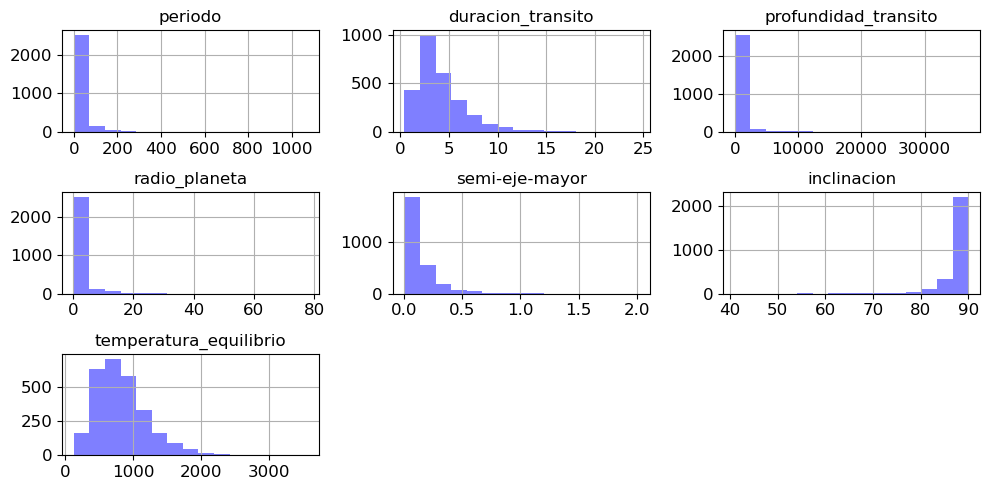

In [22]:
variables_dist = ['periodo', 'duracion_transito', 'profundidad_transito', 
                  'radio_planeta', 'semi-eje-mayor',
                   'inclinacion', 'temperatura_equilibrio']

confirmados[variables_dist].hist(bins=15, figsize=(10, 5), color='b', alpha = 0.5, xlabelsize=12, ylabelsize=12)
plt.tight_layout();

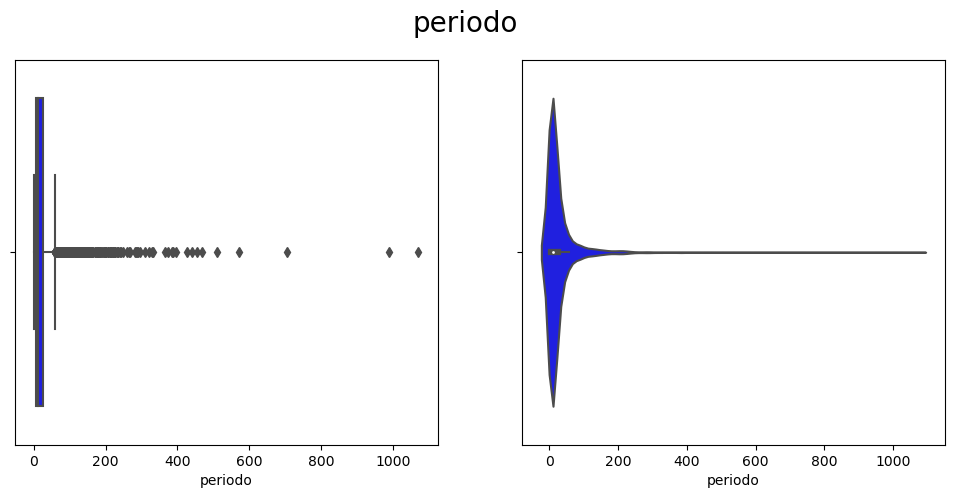

In [23]:
var = 'periodo'
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle(var, fontsize=20)

sns.boxplot(data=confirmados, x = var, color='b', ax = ax[0])
sns.violinplot(data=confirmados, x = var, color='b', alpha = 0.5, xlabelsize=12, ylabelsize=12, ax = ax[1]);

In [24]:
confirmados[var].describe()

count    2738.000000
mean       27.775979
std        56.298865
min         0.341842
25%         5.101174
50%        11.339560
75%        26.123289
max      1071.232624
Name: periodo, dtype: float64

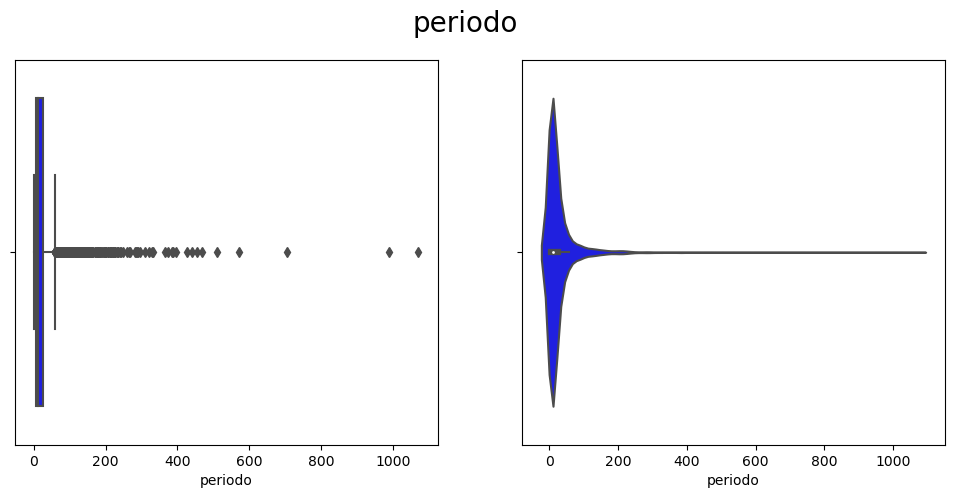

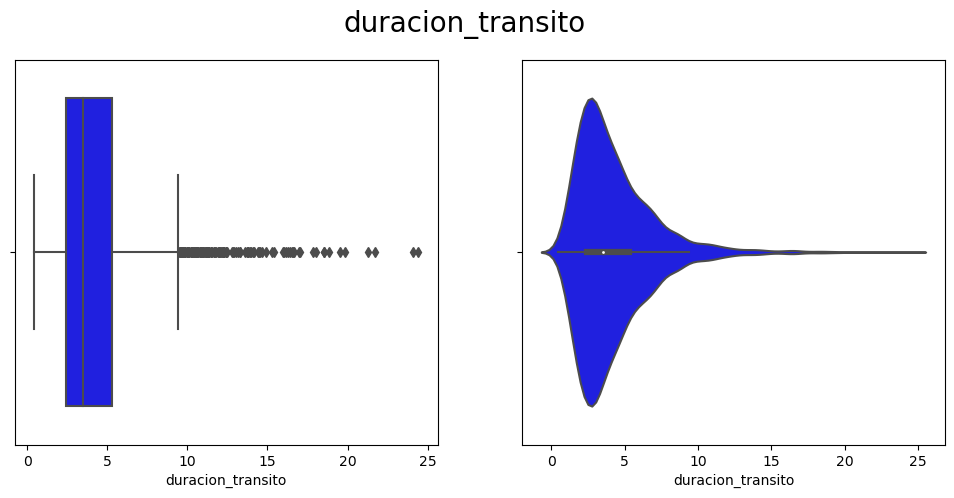

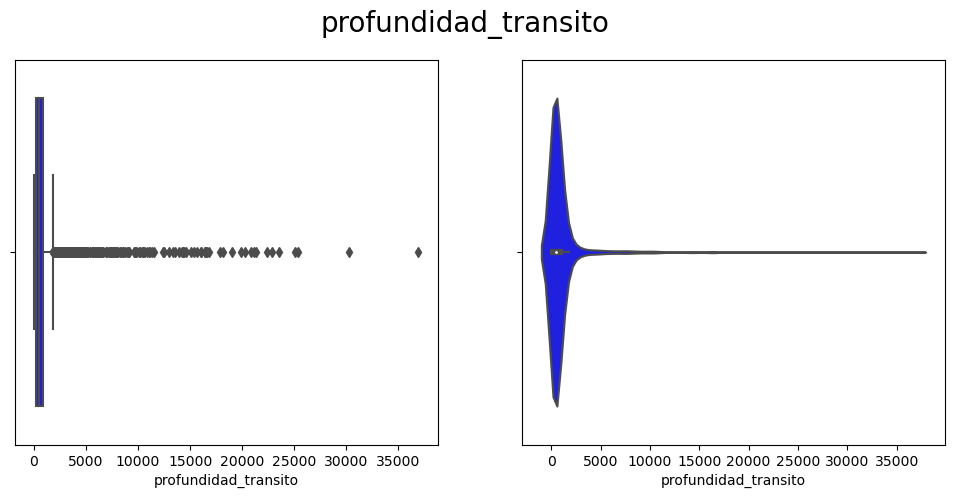

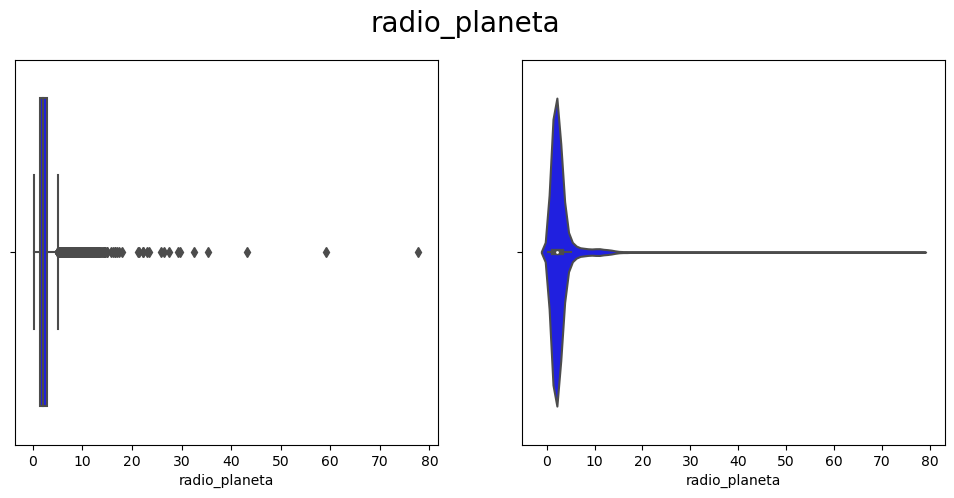

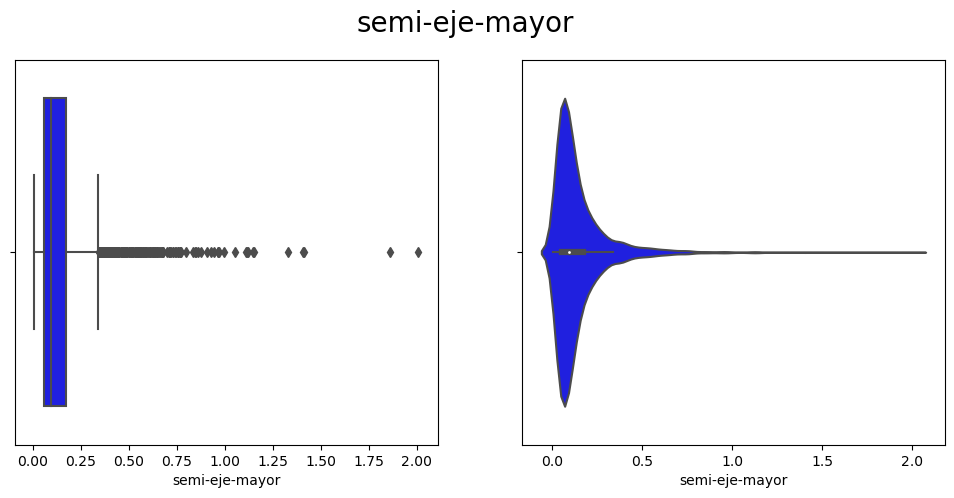

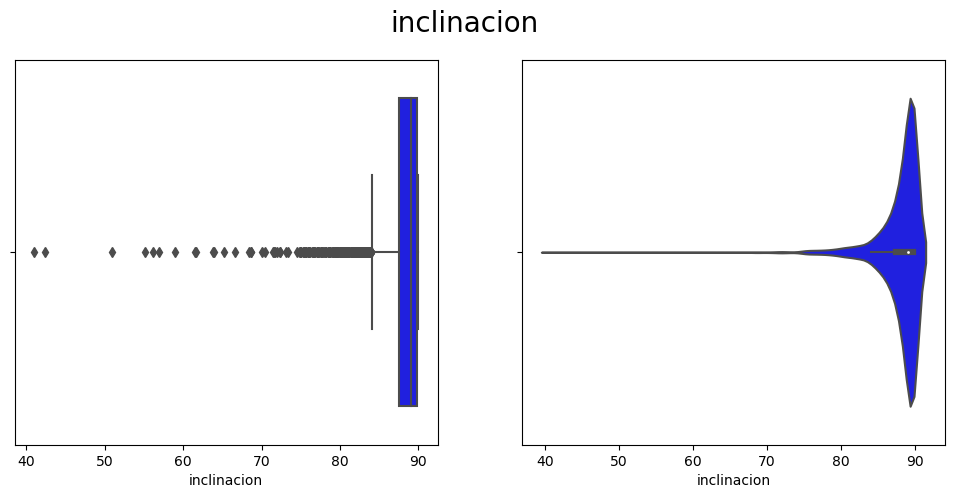

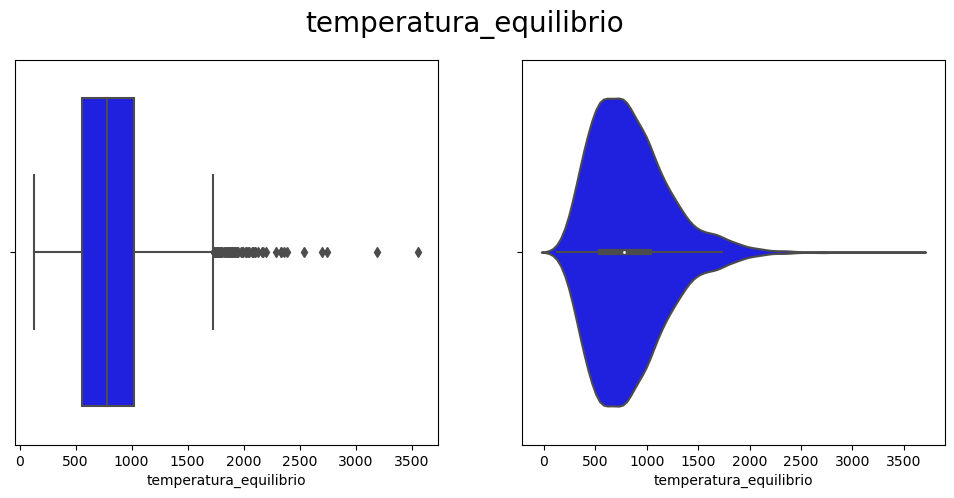

In [25]:
for var in variables_dist:
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    fig.suptitle(var, fontsize=20)

    sns.boxplot(data=confirmados, x = var, color='b', ax = ax[0])
    sns.violinplot(data=confirmados, x = var, color='b', alpha = 0.5, xlabelsize=12, ylabelsize=12, ax = ax[1]);

In [26]:
def filtro(df, col, iqr_score):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    filtro_inferior = df[col] > df[col].quantile(0.25) - (iqr *iqr_score)
    filtro_superior = df[col] < df[col].quantile(0.75) + (iqr *iqr_score)
    return df[filtro_inferior & filtro_superior]


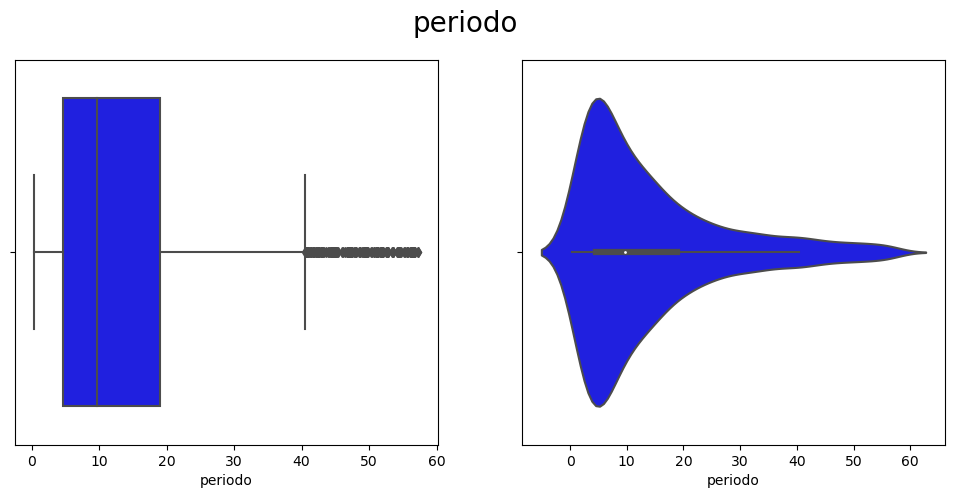

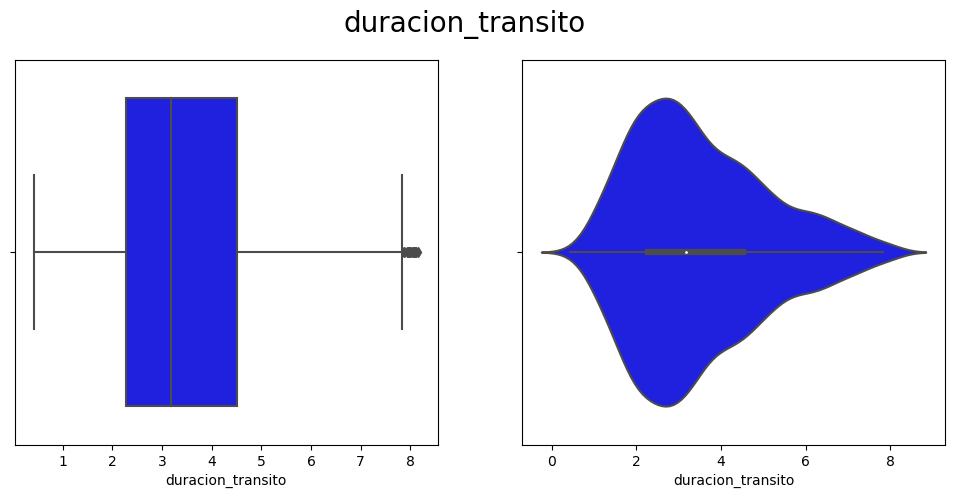

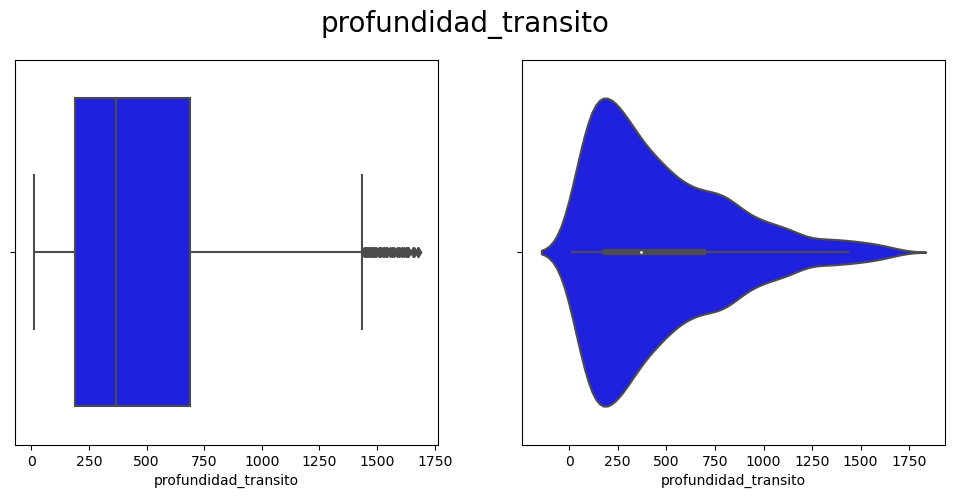

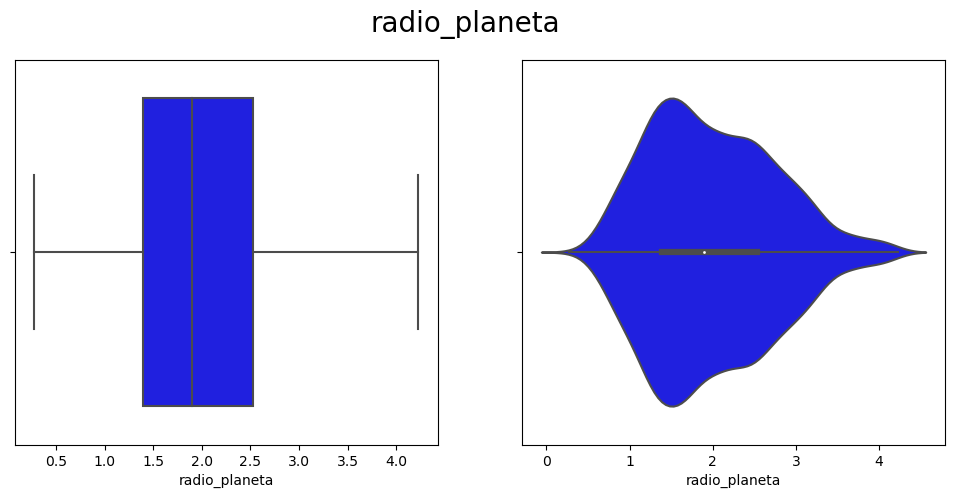

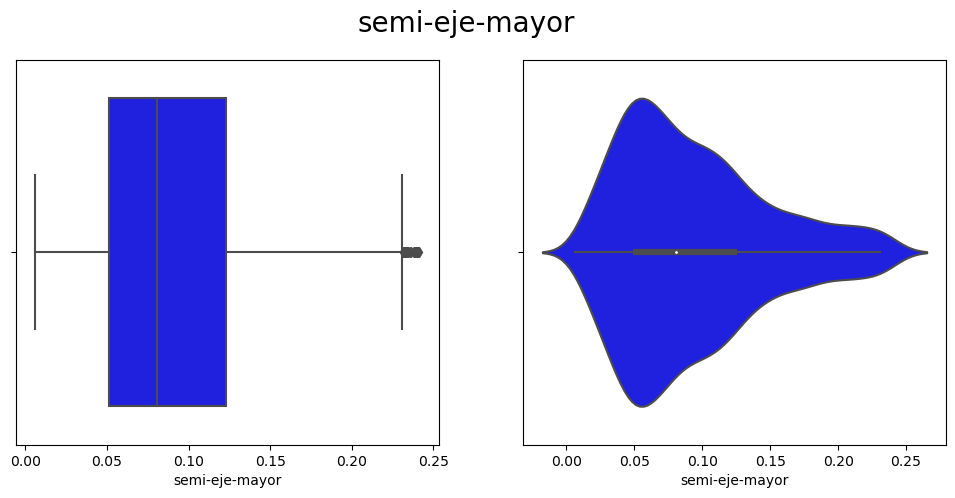

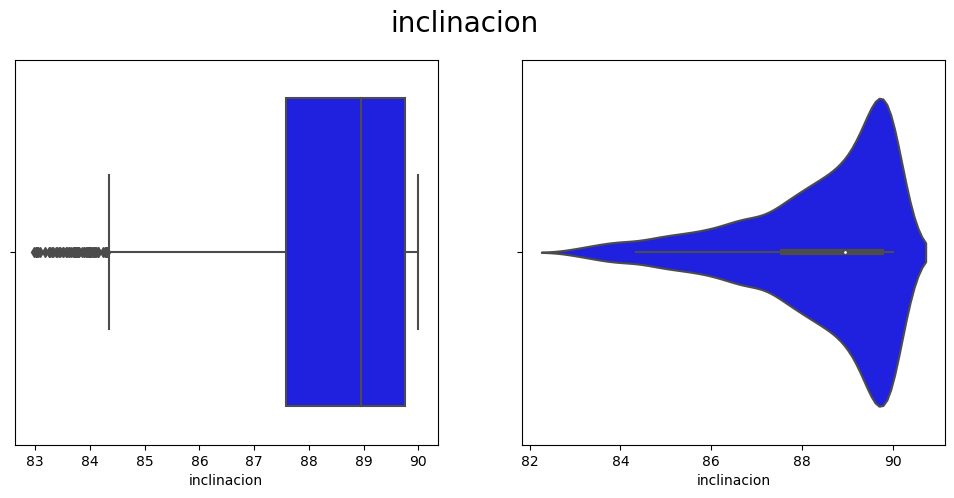

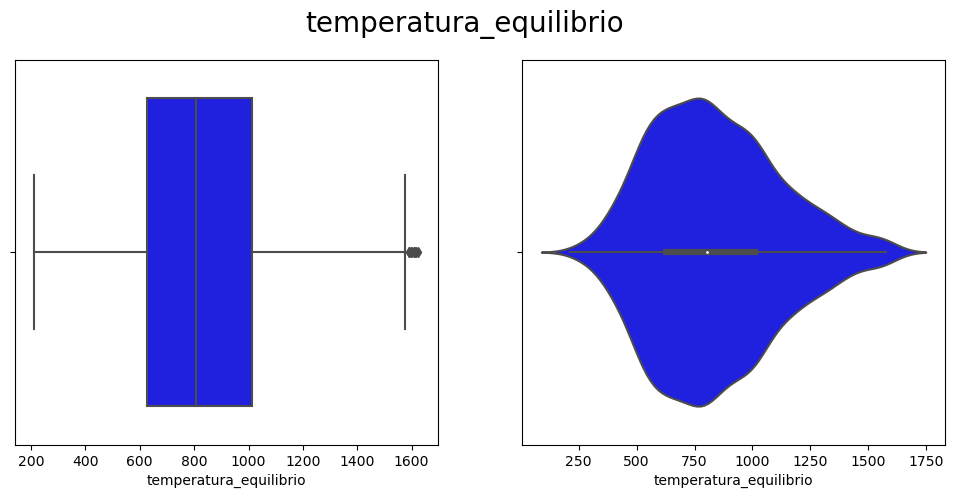

In [27]:
df_cut = confirmados.copy()
for var in variables_dist:
    df_cut = filtro(df_cut, var, 1.5)
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    fig.suptitle(var, fontsize=20)

    sns.boxplot(data=df_cut, x = var, color='b', ax = ax[0])
    sns.violinplot(data=df_cut, x = var, color='b', alpha = 0.5, xlabelsize=12, ylabelsize=12, ax = ax[1]);

#### Tierra
temperatura_equilibrio: 255K 

temperatura real: 288K (considerando atmosfera y efecto invernadero)

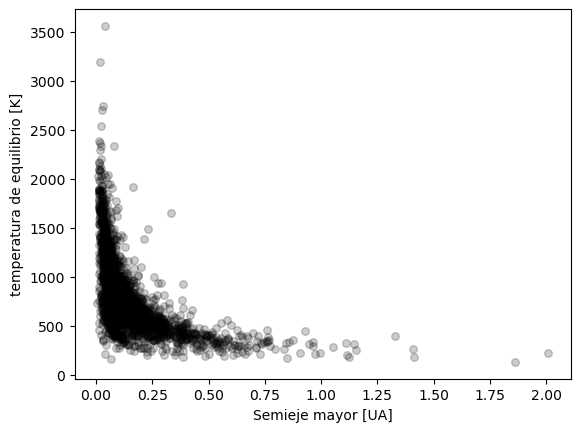

In [28]:
fig, ax = plt.subplots()
x = confirmados['semi-eje-mayor']
y = confirmados['temperatura_equilibrio']

ax.scatter(x, y, c='k', s=30, alpha=0.2)
ax.set_xlabel(r'Semieje mayor [UA]')
ax.set_ylabel('temperatura de equilibrio [K]');

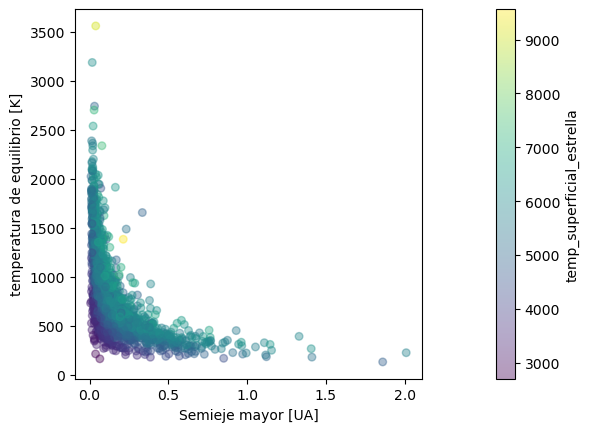

In [29]:
fig, ax = plt.subplots()
x = confirmados['semi-eje-mayor']
y = confirmados['temperatura_equilibrio']
z = confirmados['temp_superficial_estrella']

im = ax.scatter(x, y, c=z, s=30, alpha=0.4)
ax.set_xlabel(r'Semieje mayor [UA]')
ax.set_ylabel('temperatura de equilibrio [K]')
plt.colorbar(im, ax=ax, pad=0.15, label = 'temp_superficial_estrella');


### Distribución de las propiedades de las estrellas

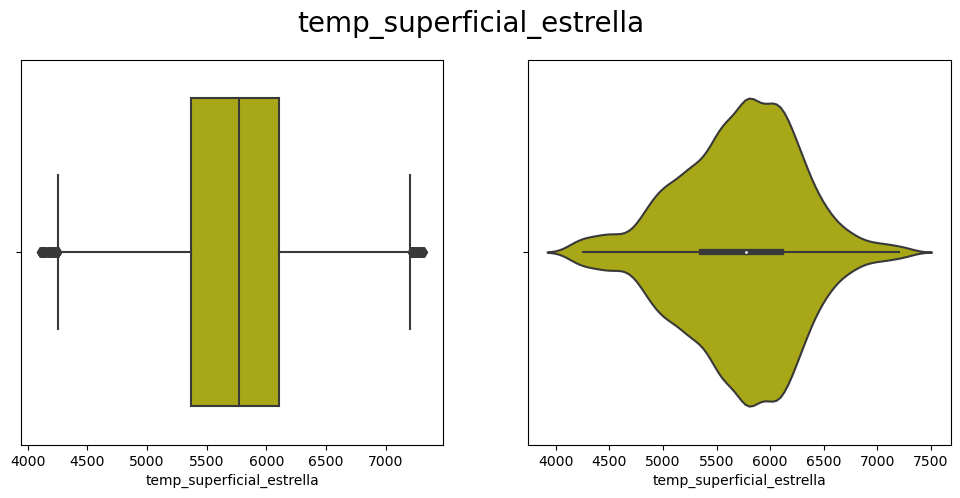

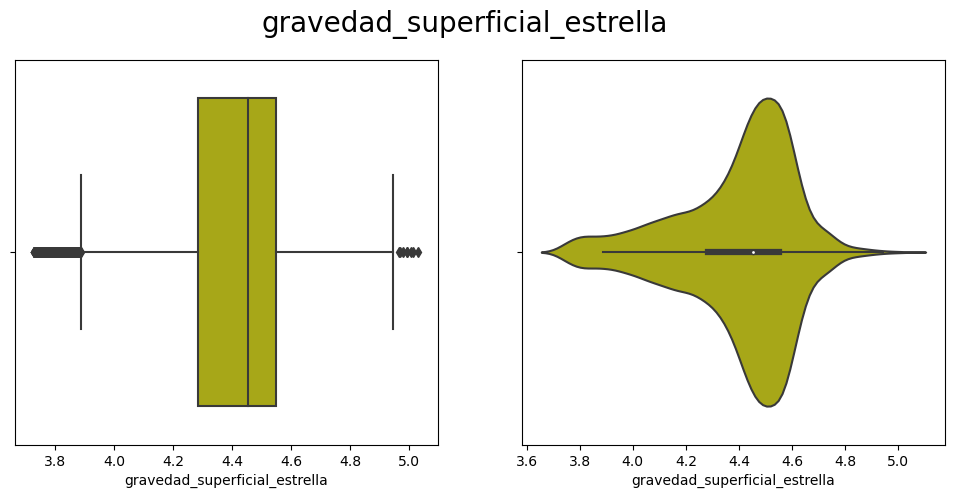

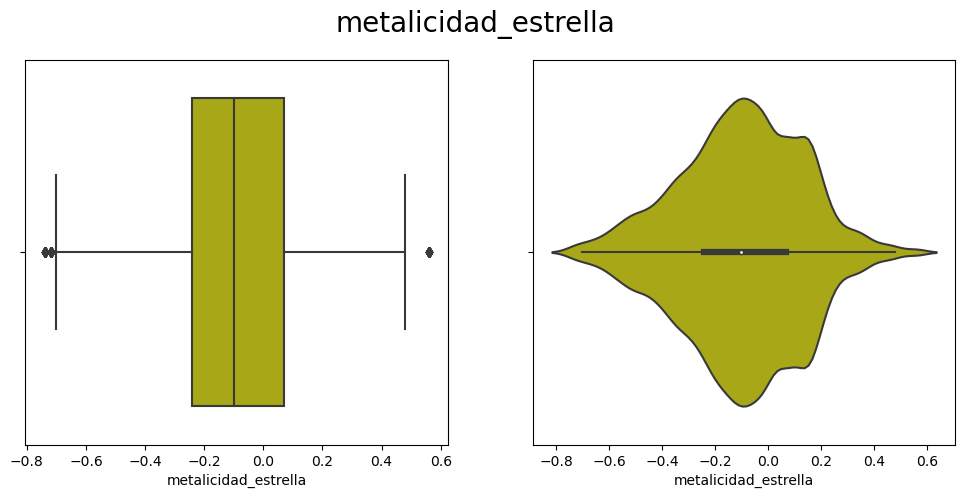

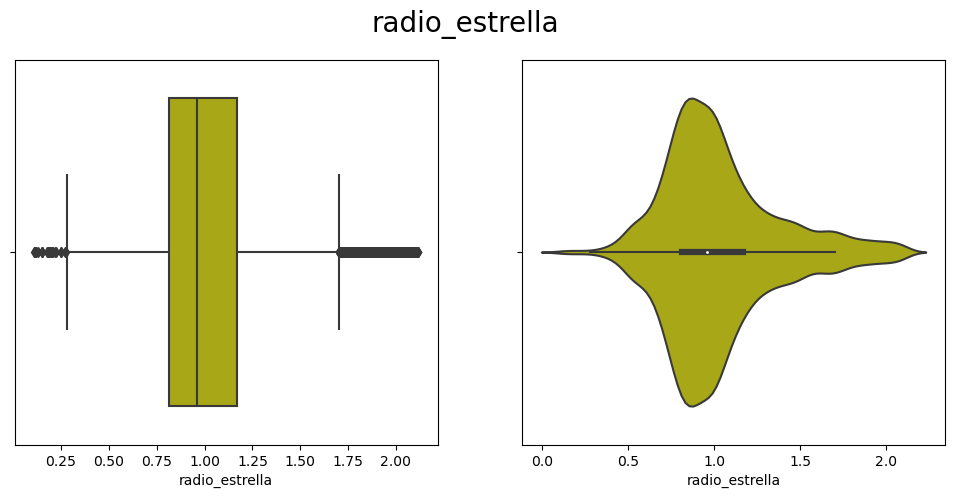

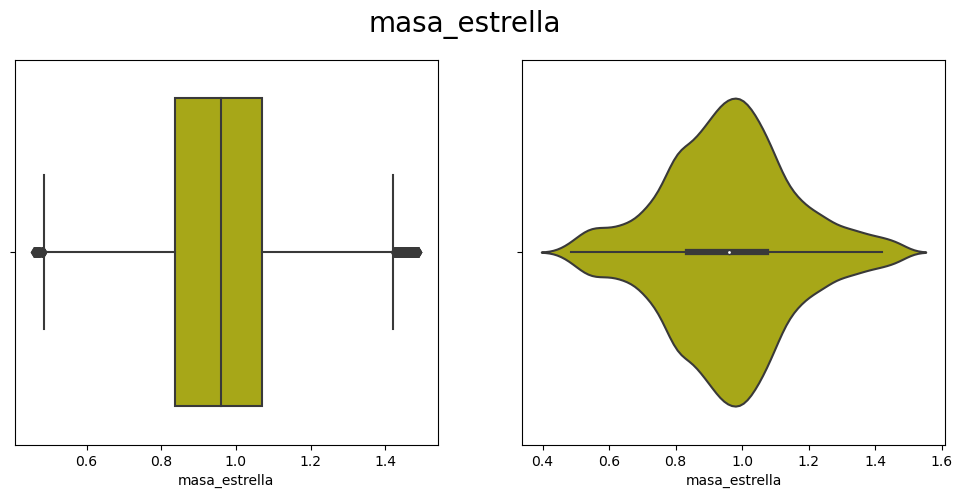

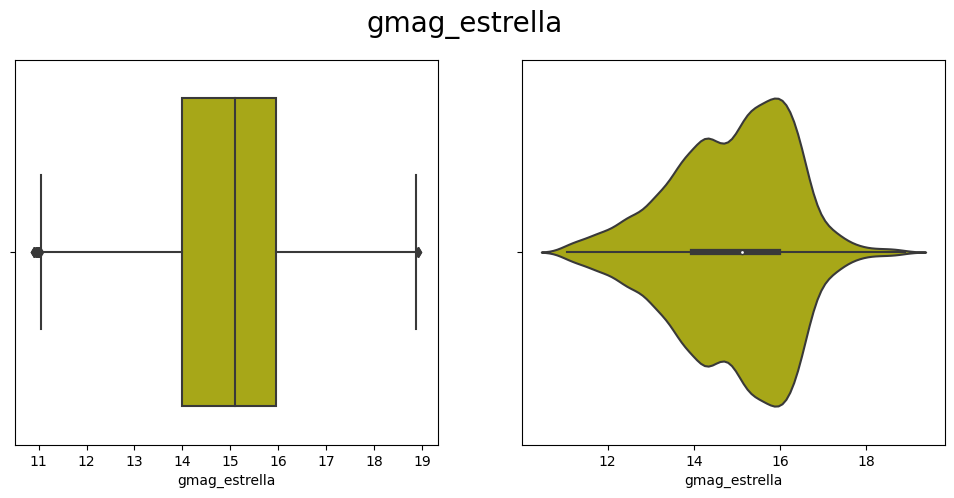

In [30]:
for var in ['temp_superficial_estrella', 'gravedad_superficial_estrella',
       'metalicidad_estrella', 'radio_estrella', 'masa_estrella', 'gmag_estrella']:
    df_cut = filtro(df1, var, 1.5)
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    fig.suptitle(var, fontsize=20)

    sns.boxplot(data=df_cut, x = var, color='y', ax = ax[0])
    sns.violinplot(data=df_cut, x = var, color='y', alpha = 0.5, xlabelsize=12, ylabelsize=12, ax = ax[1]);

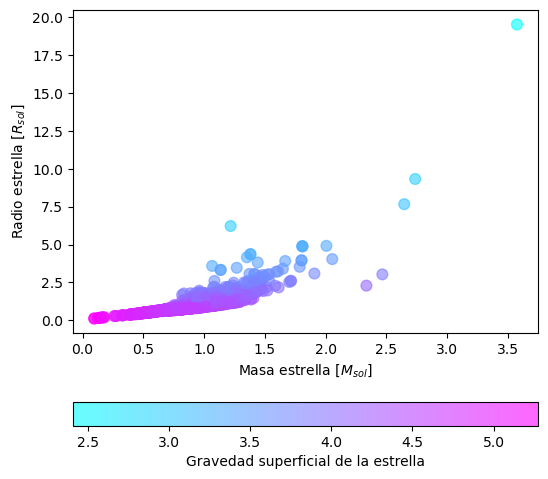

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
x = confirmados['masa_estrella']
y = confirmados['radio_estrella']
z = confirmados['gravedad_superficial_estrella']
im = ax.scatter(x, y, c = z, s=60, alpha=0.6, cmap='cool') # c= color
ax.set_xlabel(r'Masa estrella [$M_{sol}$]')
ax.set_ylabel('Radio estrella [$R_{sol}$]');
plt.colorbar(im, ax=ax, location= 'bottom', pad=0.15, label = 'Gravedad superficial de la estrella');


---
---

# Identificación de Sistemas Planetarios

### ¿Cuántas estrellas diferentes hay en nuestro dataset?

In [32]:
df1['numero_planetas'].unique()

array([2, 1, 3, 4, 5, 6, 7])

In [33]:
len(df1)

9139

In [34]:
len(df1['id'].unique())

7874

### EJERCICIO: ¿Cuántos sistemas planetarios tienen 5 o más planetas?

---
---

# Ajuste de Modelos

## Regresión Lineal Simple

Coeficiente de Correlación, r: 0.70
r2: 0.48


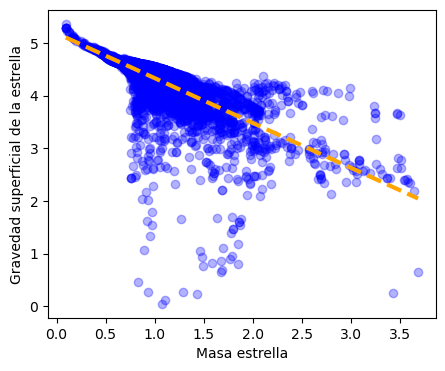

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df1[['masa_estrella']]
y = df1[['gravedad_superficial_estrella']]

modelo_regresion_simple = LinearRegression()
modelo_regresion_simple.fit(x, y)
y_pred = modelo_regresion_simple.predict(x)

r2 = r2_score(y, y_pred)
print('Coeficiente de Correlación, r: {:.2f}'.format(np.sqrt(r2)))
print('r2: {:.2f}'.format(r2))

m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=3)
ax.set_xlabel('Masa estrella')
ax.set_ylabel('Gravedad superficial de la estrella')
plt.show()

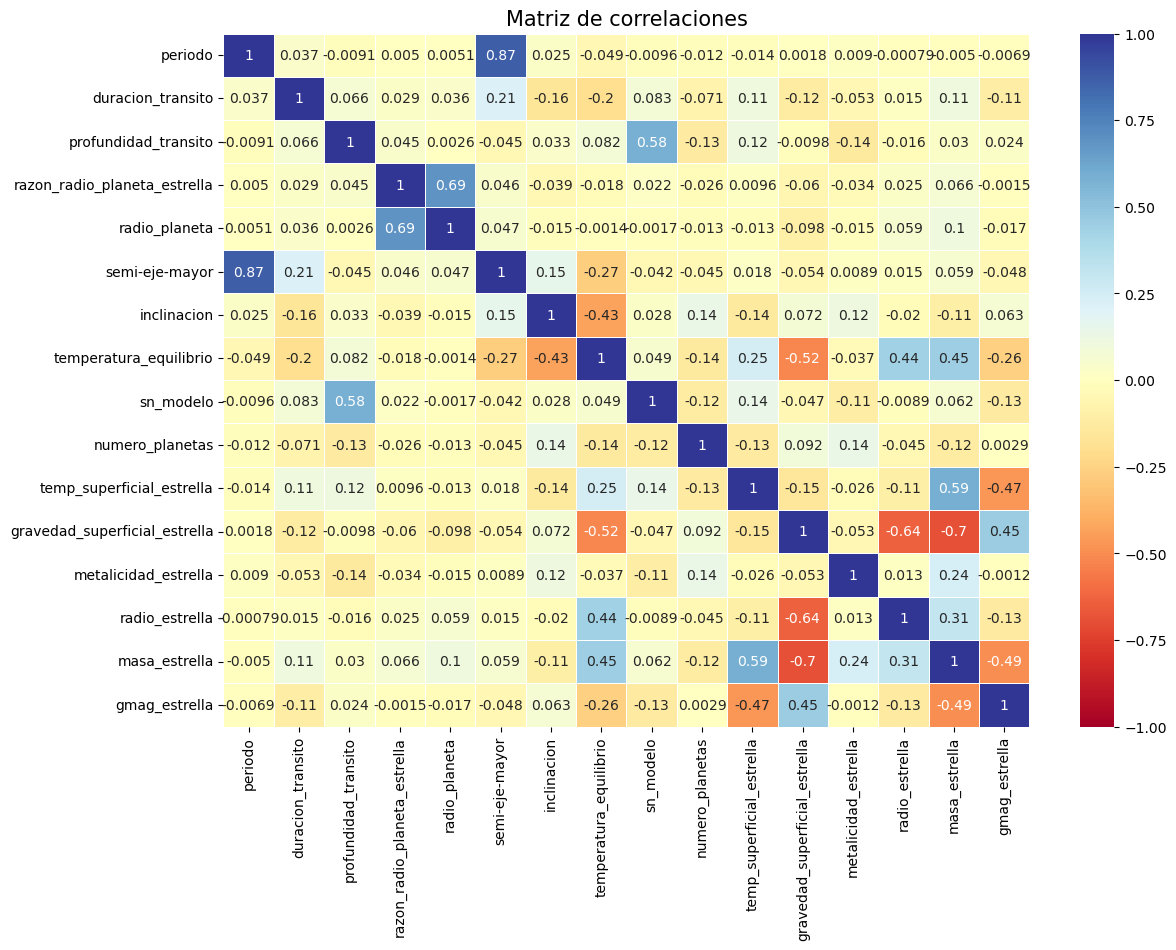

In [38]:
df_cor = df1.drop(columns=['id', 'ra', 'dec'])
correlaciones = df_cor.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(13, 9))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=True, cmap="RdYlBu", linewidths=.5)
ax.set_title('Matriz de correlaciones', fontsize=15);

---
---

## Leyes de Kepler

1. Todos los planetas se desplazan alrededor del Sol describiendo órbitas elípticas. El Sol se encuentra en uno de los focos de la elipse.

2. El radio vector que une un planeta y el Sol recorre áreas iguales en tiempos iguales.

3. El cuadrado de su periodo orbital es directamente proporcional al cubo de la longitud del semieje mayor de su órbita elíptica. 

$P^2 = C a^3$

linealizamos: \
$P = C a^{3/2}$

$log(P) = log(C) + (2/3)*log(a)$

In [39]:
# Sistema solar
planeta = ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Jupiter', 'Saturno', 'Urano', 'Neptuno']

P_yr = [0.241,.615, 1., 1.88, 11.8, 29.5, 84.0, 165]

sma_UA = [0.39, 0.72, 1., 1.52, 5.20, 9.54, 19.18, 30.06]

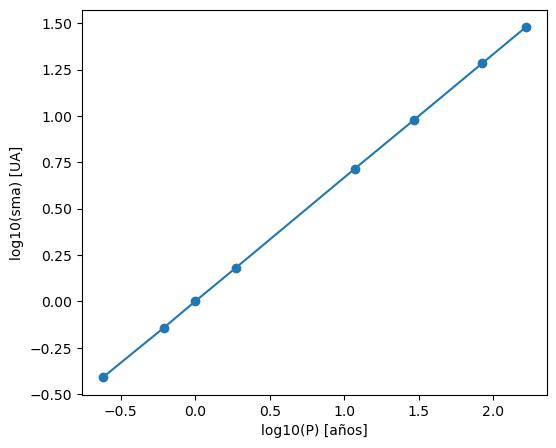

In [40]:
x_t = np.log10(P_yr)
y_t = np.log10(sma_UA)

plt.figure(figsize=(6, 5))
plt.plot(x_t, y_t, 'o-')
plt.xlabel('log10(P) [años]')
plt.ylabel('log10(sma) [UA]');

### EJERCICIO: Incluir a los exoplanetas confirmados en la grafica anterior

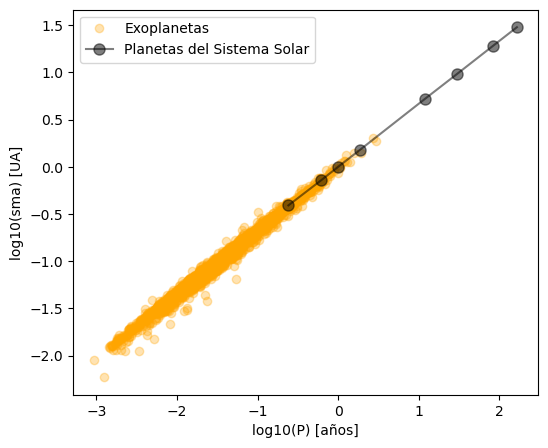

Coeficiente de Correlación, r: 0.99
r2: 0.99
m: [0.67433013]
C: 0.9933979584373698


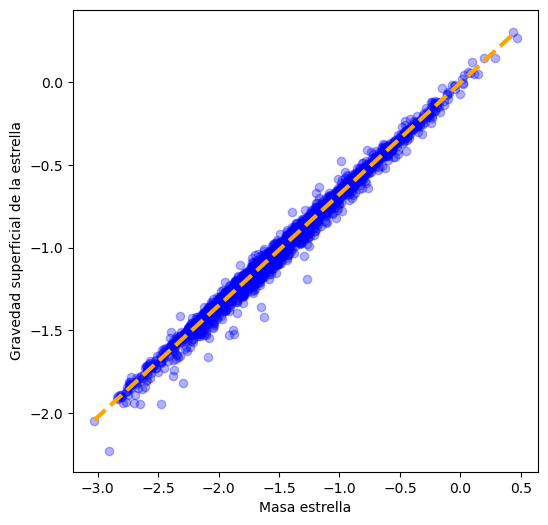

In [42]:
modelo_regresion_simple = LinearRegression()
xp_t = np.array(xp_t).reshape(-1, 1)
yp_t = np.array(yp_t)
modelo_regresion_simple.fit(xp_t, yp_t) # .reshape(-1, 1)
y_pred = modelo_regresion_simple.predict(xp_t)

r2 = r2_score(yp_t, y_pred)
print('Coeficiente de Correlación, r: {:.2f}'.format(np.sqrt(r2)))
print('r2: {:.2f}'.format(r2))

m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(xp_t.min(), xp_t.max(), 100)

print('m:', m)
print('C:', 10**b)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(xp_t, yp_t, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=3)
ax.set_xlabel('Masa estrella')
ax.set_ylabel('Gravedad superficial de la estrella')
plt.show()

---
---

# Modelos de Machine Learning 
### para predecir si un candidato es planeta (CONFIRMADO) o no (FALSO POSITIVO)

## Regresión logística

#### Método de clasificación supervisada

In [43]:
from sklearn import preprocessing

In [44]:
df_lr = df1.copy()
le = preprocessing.LabelEncoder()
le.fit_transform(df_lr["clasificacion_archivo"])
le.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [45]:
df_lr['clasificacion_archivo'] = le.transform(df_lr['clasificacion_archivo'])

In [46]:
df_lr[df_lr['clasificacion_archivo']>0]

,id,clasificacion_archivo,clasificacion_kepler,periodo,duracion_transito,profundidad_transito,razon_radio_planeta_estrella,radio_planeta,semi-eje-mayor,inclinacion,...,sn_modelo,numero_planetas,temp_superficial_estrella,gravedad_superficial_estrella,metalicidad_estrella,radio_estrella,masa_estrella,ra,dec,gmag_estrella
0,10797460,1,CANDIDATE,9.488036,2.95750,615.8,0.022344,2.26,0.0853,89.66,...,35.8,2,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.890
1,10797460,1,CANDIDATE,54.418383,4.50700,874.8,0.027954,2.83,0.2734,89.57,...,25.8,2,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.890
3,10848459,2,FALSE POSITIVE,1.736952,2.40641,8079.2,0.387394,33.46,0.0267,67.09,...,505.6,1,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,16.100
4,10854555,1,CANDIDATE,2.525592,1.65450,603.3,0.024064,2.75,0.0374,85.41,...,40.9,1,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,16.015
5,10872983,1,CANDIDATE,11.094321,4.59450,1517.5,0.036779,3.90,0.0992,88.11,...,66.5,3,6046.0,4.486,-0.08,0.972,1.053,296.28613,48.224670,16.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9557,10205598,2,FALSE POSITIVE,373.893980,27.66000,730.0,0.032878,2.51,0.8885,88.57,...,18.5,1,5263.0,4.574,-0.66,0.699,0.668,290.93597,47.290730,15.534
9558,10031643,2,FALSE POSITIVE,8.589871,4.80600,87.7,0.009364,1.11,0.0779,85.14,...,8.4,1,5638.0,4.296,-0.16,1.088,0.856,298.74921,46.973351,15.064
9559,10090151,2,FALSE POSITIVE,0.527699,3.22210,1579.2,0.297633,29.35,0.0128,20.78,...,453.3,1,5638.0,4.529,0.14,0.903,1.005,297.18875,47.093819,14.082
9561,10147276,2,FALSE POSITIVE,0.681402,0.86500,103.6,0.009444,1.07,0.0157,88.60,...,12.3,1,6173.0,4.447,-0.04,1.041,1.104,294.16489,47.176281,15.853


In [47]:
df_lr = df_lr[ df_lr['clasificacion_archivo'] > 0 ]

In [48]:
X = df_lr.drop(columns=['clasificacion_archivo', 'id', 'ra', 'dec', 'clasificacion_kepler', 'sn_modelo'])
y = df_lr['clasificacion_archivo']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression(max_iter=10000)
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [50]:
X_normalized = preprocessing.normalize(X)
X_normalized

array([[1.71036116e-03, 5.33133870e-04, 1.11007215e-01, ...,
        1.67105697e-04, 1.65663576e-04, 2.86441156e-03],
       [9.81669918e-03, 8.13031571e-04, 1.57807859e-01, ...,
        1.67224377e-04, 1.65781232e-04, 2.86644590e-03],
       [1.72898776e-04, 2.39537555e-04, 8.04215330e-01, ...,
        7.87372916e-05, 8.32166571e-05, 1.60261744e-03],
       ...,
       [8.48897109e-05, 5.18332177e-04, 2.54042449e-01, ...,
        1.45263634e-04, 1.61672151e-04, 2.26534053e-03],
       [1.03859270e-04, 1.31843347e-04, 1.57907176e-02, ...,
        1.58669276e-04, 1.68271740e-04, 2.41631512e-03],
       [7.36567548e-04, 4.66873693e-04, 1.16339221e-02, ...,
        1.80955268e-04, 1.91117886e-04, 2.30706591e-03]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression(max_iter=10000)
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

### Evaluación del desempeño del modelo

In [52]:
print('score: ', reg_log.score(X_test, y_test))

score:  0.7340669417698303


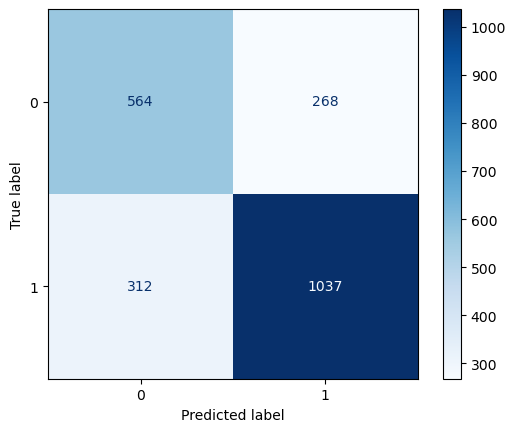

In [53]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

## Random Forest

#### Método de clasificación supervisada

In [54]:
X = df_lr.drop(columns=['clasificacion_archivo', 'id', 'ra', 'dec', 'clasificacion_kepler', 'sn_modelo'])
y = df_lr['clasificacion_archivo']

X_normalized = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 10, random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)


### EJERCICIO: Evaluar el desempeño de este modelo

### EJERCICIO: Utilizando el modelo entrenado, ¿cuántos verdaderos positivos se esperan de la lista de candidatos? 

# Conclusion

Logramos construir un modelo capaz de predecir correctamente 90 de cada 100 si un candidato a planeta es verdaderamente un planeta o un falso positivo. 